## Aufgabe 1 - Daten visualisieren - Balkendiagramme

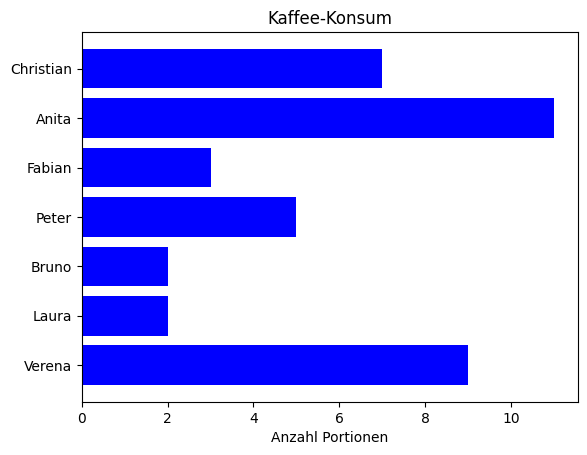

Mittelwert: 5.571 
Median: 5.000 
Standardabweichung: 3.289 
Spannweite: 9


In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Originalzustand (alle Parameter auf ihre Defaultwerte setzen) herstellen:
plt.rcdefaults() 

# Grafik initialisieren
fig, ax = plt.subplots()

# Daten festhalten / zuordnen
personen = ('Christian', 'Anita', 'Fabian', 'Peter', 'Bruno', 'Laura', 'Verena')
portionen = (7, 11, 3, 5, 2, 2, 9)

# Position hängt von der Länge der Namen ab
y_pos = np.arange(len(personen))

# a) Balkendiagramm (barh)
ax.barh(y_pos, portionen, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(personen)

# die Beschriftungen von oben nach unten; in der Reihenfolge des Tupels "personen"
ax.invert_yaxis()
# die Achsenbeschriftungen
ax.set_xlabel('Anzahl Portionen')
ax.set_title('Kaffee-Konsum')
plt.show()

# b) Ausgabe der Lage- und Streumasse
mittelwert = np.mean(portionen)
print("Mittelwert:", "%.3f " % mittelwert)

median = np.median(portionen)
print("Median:", "%.3f " % median)

standardabweichung = np.std(portionen)
print("Standardabweichung:", "%.3f " % standardabweichung)

minimum = np.min(portionen)
maximum = np.max(portionen)
spannweite = maximum - minimum
print("Spannweite:", spannweite)


## Aufgabe 2 - Daten auswerten und vergleichen (AM / Median), Ausreisser

a) Daten ohne Ausreisser

In [107]:
import statistics  # wir importieren die Befehle aus dem Modul 'statistics'

daten = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

print('Daten ohne Ausreisser:', daten)
print('Arithmetischer Mittelwert:  ', statistics.mean(daten))
print('Median:', statistics.median(daten))

Daten ohne Ausreisser: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
Arithmetischer Mittelwert:   7.500909090909091
Median: 7.58


In diesem Beispiel sind die Werte vom Median und vom arithmetischen Mittel ähnlich und beide sind gut geeignet, um die Lage zu beschreiben. Jetzt erweitern wir die Daten um einen einzelnen Ausreisser.

b) Daten mit Ausreisser

In [108]:
import statistics  # wir importieren die Befehle aus dem Modul 'statistics'

# wir fügen einen extremen Datenwert hinzu
daten.append(100)

print('Daten mit Ausreisser:', daten)
print('Arithmetischer Mittelwert:  ', statistics.mean(daten))
print('median:', statistics.median(daten))

Daten mit Ausreisser: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68, 100]
Arithmetischer Mittelwert:   15.209166666666667
median: 7.81


c) Durch den Ausreisser wird das __arithmetische Mittel__ stark beeinflusst, sodass es jetzt deutlich höher ist. Es ist sogar höher als alle Datenpunkte, die wir ursprünglich betrachtet haben. Das ist offensichtlich keine gute Beschreibung der Mitte der Daten. Im Vergleich dazu hat sich der __Median__ kaum verändert und ist nur zum Mittelwert mit dem nächst höherem Wert geworden, da wir jetzt eine gerade Anzahl von Datenpunkten haben.  

Eine berechtigte Frage ist, warum wir das arithmetische Mittel überhaupt betrachten, wenn der Median scheinbar aufgrund seiner Robustheit überlegen ist. Die Gründe hierfür kommen aus der Stochastik. Das arithmetische Mittel ist eng verwandt mit dem Erwartungswert von Zufallsvariablen. Die Normalverteilung kann man vollständig durch den Mittelwert und die Standardabweichung beschreiben. Hieraus folgt, dass das arithmetische Mittel für die Normalverteilung die bestmögliche Schätzung für die Mitte der Daten ist. Trotzdem ist es ratsam, den Median zu verwenden, wenn wir die Verteilung der Daten nicht kennen oder wir befürchten, dass es Ausreisser gibt.

Das arithmetische Mittel und der Median sind nur für numerische Daten definiert. Es gibt jedoch auch nicht numerische Daten. Die Grösse von Kleidungsstücken wird häufig in den Kategorien "Small", "Medium" und "Large" angegeben. Man spricht hierbei von kategorischen Daten. Der __Modus__ der Daten kann benutzt werden, um die Lage von kategorischen Daten zu bestimmen. Der Modus ist definiert als der Wert, den man am häufigsten in einer Stichprobe $x$ beobachtet.

_Quelle: Data-Science-Crashkurs, Steffen Herbold, ISBN 978-386490-862-0_

## Aufgabe 3 - Daten auswerten und vergleichen (Stand.Abw. / IQA)


Mit IQR bezeichnen wir den Interquartilsabstand. Der Interquartilsabstand auch kurz Quartilsabstand genannt und mit IQA oder IQR abgekürzt, ist ein Streuungsmass in der deskriptiven Statistik. Sortiert man eine Stichprobe der Grösse nach, so gibt der Interquartilsabstand an, wie breit das Intervall ist, in dem die mittleren 50 % der Stichprobeelemente liegen. Siehe dazu die Einträge in Wikipedia: [IQR](https://de.wikipedia.org/wiki/Interquartilsabstand_(Deskriptive_Statistik)) und [Boxplot](https://de.wikipedia.org/wiki/Box-Plot) oder als Erklärvideo bei Studyflix: [Quantile](https://studyflix.de/statistik/quantile-1040), [Quartile](https://studyflix.de/statistik/quartil-1628) sowie [Boxplot](https://studyflix.de/statistik/boxplot-1044).

In [109]:
import statistics               # wir importieren die Befehle aus dem Modul 'statistics'
from scipy import stats         # für die Berechnung des Interquartil-Abstandes (IQR)
import matplotlib.pyplot as plt # für die Visualisierung

# a)
daten_oA = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
print('a) Daten ohne Ausreisser:', daten_oA)
print('   Stand.Abw.: ', statistics.stdev(daten_oA))
print('   IQR:', stats.iqr(daten_oA))

# b)
daten_mA = daten_oA.copy()
daten_mA.append(100)
print('b) Daten mit Ausreisser:', daten_mA)
print('   Stand.Abw.: ', statistics.stdev(daten_mA))
print('   IQR:', stats.iqr(daten_mA))


a) Daten ohne Ausreisser: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
   Stand.Abw.:  2.031568135925815
   IQR: 2.255000000000001
b) Daten mit Ausreisser: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68, 100]
   Stand.Abw.:  26.77235292350312
   IQR: 2.465


c) Obwohl bis auf einen Datenpunkt alle Daten zwischen 4,26 und 10,84 liegen, ist die __Standardabweichung__ ein Vielfaches von diesem Datenbereich, wegen dem einen Ausreisser. Der __Interquartilsabstand__ ist jedoch, ähnlich wie der Median, kaum beeinflusst.

Wenn die Annahmen an die Standardabweichung erfüllt sind, ist es jedoch ein sehr gutes Maß für die Variabilität der Daten. Ähnlich wie beim arithmetischen Mittel, ist dies insbesondere bei normalverteilten Daten der Fall, die sich durch diese beiden Maße komplett beschreiben lassen. Außerdem kann man für die Normalverteilung beweisen, dass 68% der Daten nicht mehr als eine Standardabweichung vom arithmetischen Mittel entfernt sind, 95% der Daten nicht mehr als zwei Standardabweichungen und 99,7% nicht mehr als drei Standardabweichungen. Dieser Umstand ist auch als *68-95-99,7-Regel* bekannt.

_Quelle: Data-Science-Crashkurs, Steffen Herbold, ISBN 978-386490-862-0_

d) Boxplot je Datensatz

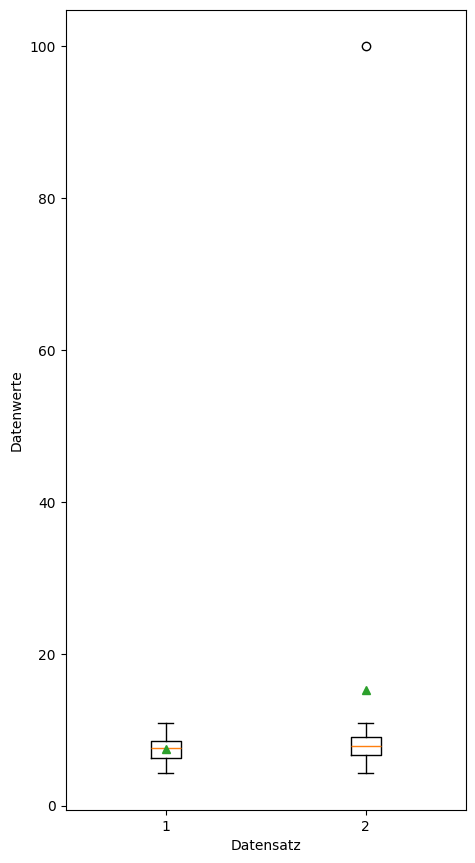

In [110]:
# jetzt erstellen wir noch für alle Daten je einen Boxplot
daten = [daten_oA, daten_mA]
# Ausgabegrösse: Breite = 4, Höhe = 8
fig = plt.figure(figsize=(4,8))
ax = fig.add_axes([0, 0, 1, 1])
plt.xlabel('Datensatz')
plt.ylabel('Datenwerte')

# zusätzlich sollen noch die arithmetischen Mittelwerte gezeichnet werden; showmeans=True
# dieser wird durch das grüne Dreieck dargestellt. Die orange Linie ist der Median
bp = ax.boxplot(daten, showmeans = True)

## Aufgabe 4 - Daten generieren, speichern, einlesen, auswerten und visualisieren

<class 'numpy.ndarray'>
original: Anzahl Zufallszahlen: 1000 Vorgabe: 1000
original: Minimum: 17.707858521002187
original: Maximum: 33.42743693322545
original: Mittelwert: 25.524195064925223 Vorgabe: 25.5
original: Spannweite: 15.719578412223264
original: Standardabweichung: 2.425317564602276 Vorgabe: 2.5

gerundet: Anzahl Zufallszahlen: 1000 Vorgabe: 1000
gerundet: Minimum: 17.7
gerundet: Maximum: 33.4
gerundet: Mittelwert: 25.523199999999996 Vorgabe: 25.5
gerundet: Spannweite: 15.7
gerundet: Standardabweichung: 2.425077681230026 Vorgabe: 2.5


(array([  6.,  14.,  85., 154., 240., 257., 139.,  78.,  22.,   5.]),
 array([17.7 , 19.27, 20.84, 22.41, 23.98, 25.55, 27.12, 28.69, 30.26,
        31.83, 33.4 ]),
 <BarContainer object of 10 artists>)

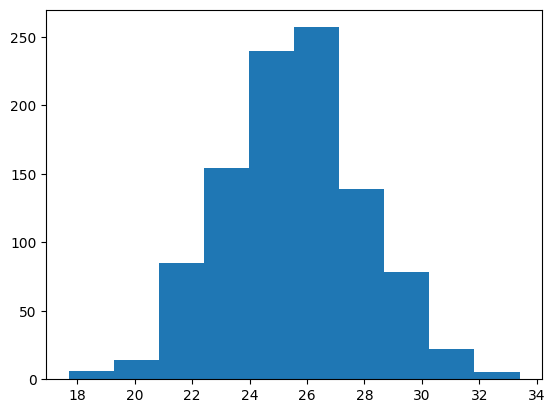

In [111]:
import numpy as np
import matplotlib.pyplot as plt

lage     = 25.5      # der Mittelwert (Sollwert) der zufällig generierten Zahlen wird festgelegt
standabw = 2.5       # die Streuung der Zufallszahlen um den Mittelwert wird festgelegt
n        = 1000     # die Anzahl der Zufallszahlen wird definiert

# a) bestimmt die Zufallszahlen mit den gewünschten Parametern/Verteilung in einem Array
zufalls_daten = np.random.normal(lage, standabw, n)
max_original = np.max(zufalls_daten)
min_original = np.min(zufalls_daten)

# Information zum Datentyp: ndarray
print(type(zufalls_daten))

# b) die Zufallszahlen werden in eine Textdatei gespeichert
np.savetxt('Daten/daten_03_4_normal.txt', zufalls_daten)

# c) Einlesen und Runden
eingelesen   = np.loadtxt('Daten/daten_03_4_normal.txt')
gerundet     = np.around(eingelesen, decimals = 1)
max_gerundet = np.max(gerundet)
min_gerundet = np.min(gerundet)

# für Aufgabe 5: die gerundeten Zufallszahlen werden in eine Textdatei gespeichert
np.savetxt('Daten/daten_03_4_normal_gerundet.txt', gerundet, fmt = '%2.1f')

# d) Berechnung von: Minimum, Maximum, Spannweite, Mittelwert und die Standardabweichung
print("original: Anzahl Zufallszahlen:", len(zufalls_daten), "Vorgabe:", n)
print("original: Minimum:", np.min(zufalls_daten))
print("original: Maximum:", np.max(zufalls_daten))
print("original: Mittelwert:", np.mean(zufalls_daten), "Vorgabe:", lage)
print("original: Spannweite:", max_original - min_original)
print("original: Standardabweichung:", np.std(zufalls_daten), "Vorgabe:", standabw)
print("")
print("gerundet: Anzahl Zufallszahlen:", len(gerundet), "Vorgabe:", n)
print("gerundet: Minimum:", np.min(gerundet))
print("gerundet: Maximum:", np.max(gerundet))
print("gerundet: Mittelwert:", np.mean(gerundet), "Vorgabe:", lage)
print("gerundet: Spannweite:", max_gerundet - min_gerundet)
print("gerundet: Standardabweichung:", np.std(gerundet), "Vorgabe:", standabw)

# e) Ausgabe des Histogramms der gerundeten Werte
plt.hist(gerundet)

## Aufgabe 5 - Daten einlesen, speichern, auswerten und visualisieren

   ZufallsZahl
0         25.0
1         23.8
2         27.4
3         28.2
4         28.0
       ZufallsZahl
count  1000.000000
mean     25.523200
std       2.426291
min      17.700000
25%      23.900000
50%      25.600000
75%      27.100000
max      33.400000
Ungleichheit: Pandas-std: ddof=1 ZufallsZahl    2.426291
dtype: float64 Numpy-std: 2.425077681230026
Gleichheit:   Pandas-std: ddof=0 ZufallsZahl    2.425078
dtype: float64 Numpy-std: 2.425077681230026


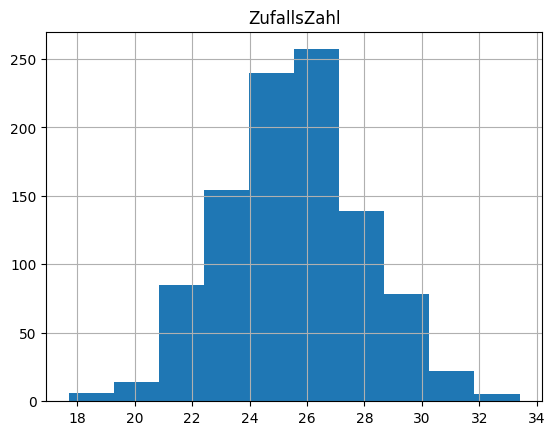

In [112]:
import pandas as pd

# a) Einlesen der Daten mit zwei wichtigen Parametern: 
# 1) decimal legt fest, wie das Dezimalkomma definiert ist
# 2) header legt fest, ob in den Daten eine Spaltenbeschriftung existiert oder nicht
daten = pd.read_csv('Daten/daten_03_4_normal_gerundet.txt', decimal ='.', header = None)

# b) wir können eine Spaltenüberschrift hinzufügen
daten.columns = ['ZufallsZahl']
# und nur gerade die ersten 5 Zeilen ausgeben
print(daten.head())

# c), d) mit dem Befehl describe kann man sich die wichtigsten Parameter berechnen lassen
print(daten.describe())

# d) mit dem Standarparameterwert ddof=1 weicht das Resultat etwas von demjenigen aus numpy ab:
# da sich diese Parameter auf eine Grundgesamtheit oder Stichprobe beziehen!
# ddof=1: Stichprobe
# ddof=0: Grundgesamtheit
print("Ungleichheit: Pandas-std: ddof=1", daten.std(ddof=1), "Numpy-std:", gerundet.std())
# jetzt stimmen die beiden Werte überein:
print("Gleichheit:   Pandas-std: ddof=0", daten.std(ddof=0), "Numpy-std:", gerundet.std())

# e) ein Histogramm wird direkt mit der vererbten Methode erstellt
daten.hist('ZufallsZahl')

# f) die Daten, mit der ergänzten Spalte werden in die folgende Datei geschrieben:
daten.to_csv('Daten/daten_03_5_normal_ueberschrift.txt', sep=';', decimal='.', header=True)


## Aufgabe 6 - Daten auswerten, vergleichen, Verteilungen (Münze)

a) Datengenerierung

In [113]:
import random
import pandas as pd

datei_name_ausgabe = 'Daten/daten_03_6_muenz_wurf.csv'

anzahl_wuerfe = int(input("Wie oft soll die Münze geworfen werden?"))

ergebnisse = []
for wurf in range(1, anzahl_wuerfe + 1):
    # wählt zufällig aus den beiden Eregnissen eines aus
    if random.choice(['Kopf', 'Zahl']) == 'Kopf':
        # wir codieren in einem numerischen Wert um
        ereignis = 'Kopf'
    else:
        ereignis = 'Zahl'
    ergebnisse.append(ereignis)

# Ergebnisse in einer CSV-Datei speichern
daten = pd.DataFrame(ergebnisse, columns=['Ereignis'])
# mit Index-Spalte "Wurf"
daten.index += 1  # Setzt den Index auf 1, damit der Wurfindex mit 1 beginnt
daten.index.name = 'Wurf'
daten.to_csv(datei_name_ausgabe)
print("Die Ergebnisse wurden in", datei_name_ausgabe, "gespeichert.")


Die Ergebnisse wurden in Daten/daten_03_6_muenz_wurf.csv gespeichert.


b) Auswertung, Analyse und Visualisierung mit Interpretation

Ereignis
Kopf    800
Zahl    700
Name: count, dtype: int64


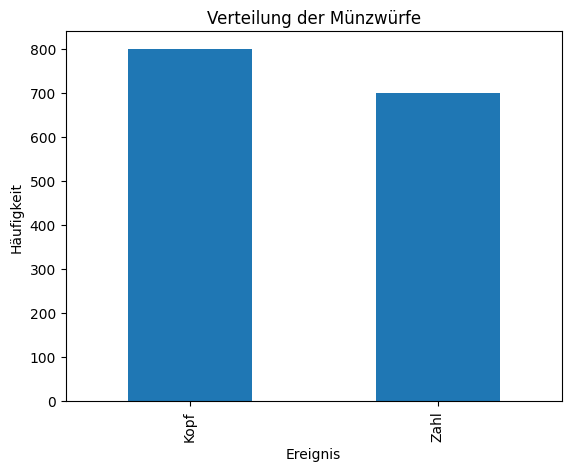

Absolute Abweichung Kopf: 50.0
Absolute Abweichung Zahl: -50.0
Relative Abweichung Kopf: 6.666666666666671 %
Relative Abweichung Zahl: -6.666666666666671 %


In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateipfad und - Name zum Einlesen der Daten
datei_name_eingabe = "Daten/daten_03_6_muenz_wurf.csv"

# Daten einlesen
daten = pd.read_csv(datei_name_eingabe)

# b) zähle die eingelesenen Daten und gib sie aus
beschreibung = daten['Ereignis'].value_counts()
print(beschreibung)

# c) die gezählten Würfe als Histogramm ausgeben
beschreibung.plot(kind = 'bar')
#plt.hist(daten['Ereignis'])
plt.title("Verteilung der Münzwürfe")
plt.xlabel("Ereignis")
plt.ylabel("Häufigkeit")
plt.show()

# d) Vergleich und Analyse der Daten
# Erwartung bei einer fairen Münze berechnen
# zwei Ereignisse: Wahrscheinlichkeit = 1/2
# mit len(daten) werden die Anzahl Ereignisse gezählt
erwartung_kopf = len(daten) / 2
erwartung_zahl = len(daten) / 2

#anzahl_kopf = beschreibung[0] # veraltet
anzahl_kopf = beschreibung.iloc[0]
anzahl_zahl = beschreibung.iloc[1]

print("Absolute Abweichung Kopf:", anzahl_kopf - erwartung_kopf)
print("Absolute Abweichung Zahl:", anzahl_zahl - erwartung_zahl)

# relative Abweichungen
print("Relative Abweichung Kopf:", (anzahl_kopf / erwartung_kopf) * 100 - 100, "%")
print("Relative Abweichung Zahl:", (anzahl_zahl / erwartung_zahl) * 100 - 100, "%")

## Aufgabe 7 - Daten auswerten, vergleichen, Verteilungen (Würfel)

       EINS  ZWEI  DREI  VIER  FUENF  SECHS
Runde                                      
1         1     0     1     1      1      0
2         1     0     1     0      0      2
3         0     0     2     1      1      0
4         1     0     1     0      2      0
5         0     1     0     1      1      1
{'EINS': 893, 'ZWEI': 1023, 'DREI': 980, 'VIER': 1083, 'FUENF': 1034, 'SECHS': 987}


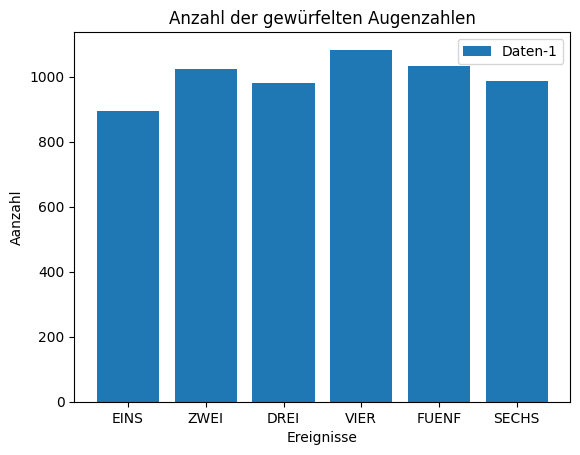

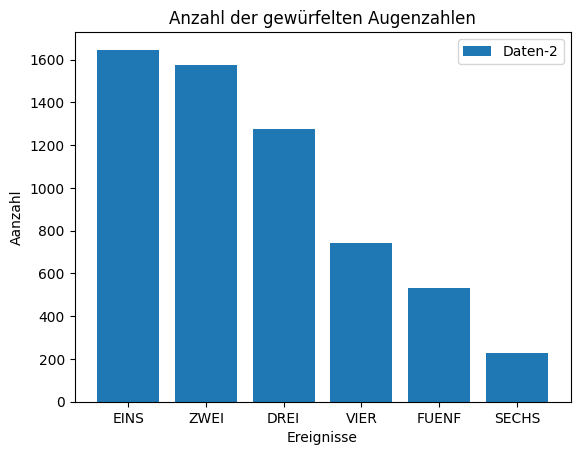

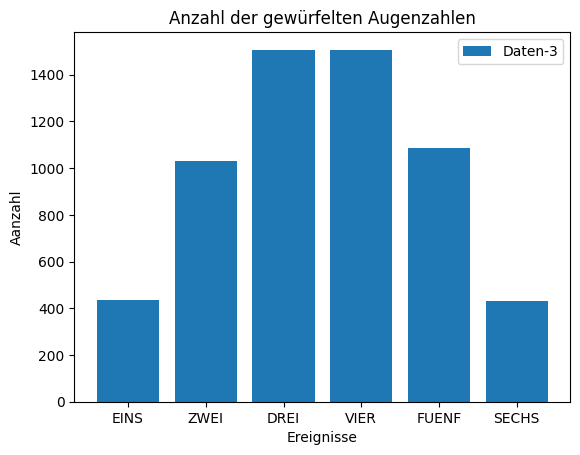

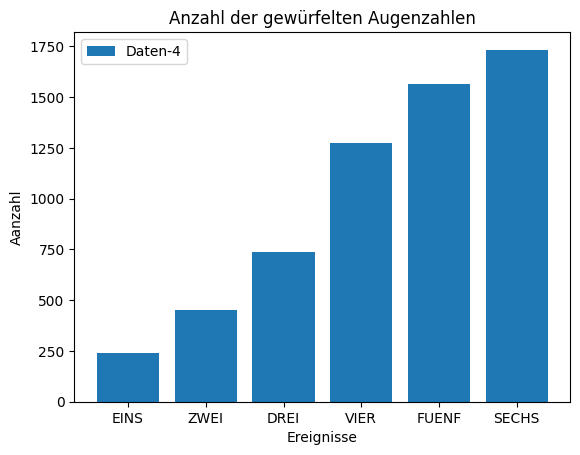

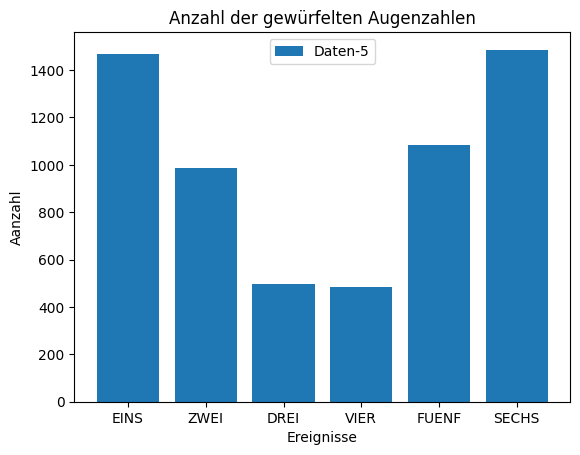

a), b): Es gibt fünf verschiedene Kategorien:
Daten-1: Gleichverteilung
Daten-2: rechts schiefe Verteilung
Daten-3: Normalverteilung, symmetrisch
Daten-4: links schiefe Verteilung
Daten-5: symmetrische Verteilung


In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Die Daten aus der ersten Datei werden eingelesen, da in den Eingabedaten
# die Spaltenüberschriften vorhanden sind, muss hier in der header-variablen
# angegeben werden, dass sich diese in der ersten Zeile befinden. die erste Spalte
# wird als Index-Spalte verwendet
eingabe_1 = pd.read_csv('Daten/daten_03_7_1.txt', delimiter=';', header = 0, index_col = 0)
eingabe_2 = pd.read_csv('Daten/daten_03_7_2.txt', delimiter=';', header = 0, index_col = 0)
eingabe_3 = pd.read_csv('Daten/daten_03_7_3.txt', delimiter=';', header = 0, index_col = 0)
eingabe_4 = pd.read_csv('Daten/daten_03_7_4.txt', delimiter=';', header = 0, index_col = 0)
eingabe_5 = pd.read_csv('Daten/daten_03_7_5.txt', delimiter=';', header = 0, index_col = 0)

# wir schauen uns die ersten 5 Zeilen an
# scheinbar wird in jeder Runde 4-mal gewürfelt
print(eingabe_1.head())

# wir ermitteln die Spaltennamen
spalten = list(eingabe_1.columns)

# mit der folgenden Funktion addieren wir die einzelnen
# Häufigkeiten je eingabe
def berechne_Summe(eingabe):
    summe = []
    for i in spalten:
        s = eingabe[i].sum()
        summe.append(s)
    return summe

summe_1   = berechne_Summe(eingabe_1)
summe_2   = berechne_Summe(eingabe_2)
summe_3   = berechne_Summe(eingabe_3)
summe_4   = berechne_Summe(eingabe_4)
summe_5   = berechne_Summe(eingabe_5)

# die einzelnen Häufigkeiten werden den jeweiligen Augenzahlen
# zugeordnet (mit Hilfe einer Dictionary-Variablen)
haeufig_1 = dict(zip(spalten, summe_1))
haeufig_2 = dict(zip(spalten, summe_2))
haeufig_3 = dict(zip(spalten, summe_3))
haeufig_4 = dict(zip(spalten, summe_4))
haeufig_5 = dict(zip(spalten, summe_5))

# damit wir uns vorstellen können, wie die Daten gespeichert sind,
# geben wir sie für den ersten Datensatz aus:
print(haeufig_1)

# Teilaufgaben a) und d)
plt.bar(haeufig_1.keys(), haeufig_1.values(), label='Daten-1')
plt.xticks(spalten)
plt.xlabel('Ereignisse')
plt.ylabel('Aanzahl')
plt.title('Anzahl der gewürfelten Augenzahlen')
plt.legend()
plt.show()
plt.bar(haeufig_2.keys(), haeufig_2.values(), label='Daten-2')
plt.xlabel('Ereignisse')
plt.ylabel('Aanzahl')
plt.title('Anzahl der gewürfelten Augenzahlen')
plt.legend()
plt.show()
plt.bar(haeufig_3.keys(), haeufig_3.values(), label='Daten-3')
plt.xlabel('Ereignisse')
plt.ylabel('Aanzahl')
plt.title('Anzahl der gewürfelten Augenzahlen')
plt.legend()
plt.show()
plt.bar(haeufig_4.keys(), haeufig_4.values(), label='Daten-4')
plt.xlabel('Ereignisse')
plt.ylabel('Aanzahl')
plt.title('Anzahl der gewürfelten Augenzahlen')
plt.legend()
plt.show()
plt.bar(haeufig_5.keys(), haeufig_5.values(), label='Daten-5')
plt.xlabel('Ereignisse')
plt.ylabel('Aanzahl')
plt.title('Anzahl der gewürfelten Augenzahlen')
plt.legend()
plt.show()

print("a), b): Es gibt fünf verschiedene Kategorien:")
print("Daten-1: Gleichverteilung")
print("Daten-2: rechts schiefe Verteilung")
print("Daten-3: Normalverteilung, symmetrisch")
print("Daten-4: links schiefe Verteilung")
print("Daten-5: symmetrische Verteilung")


d) Die Würfel 2-5 sind gezinkt.

## Aufgabe 8 - Daten generieren, analysieren und visualisieren, Verteilungen

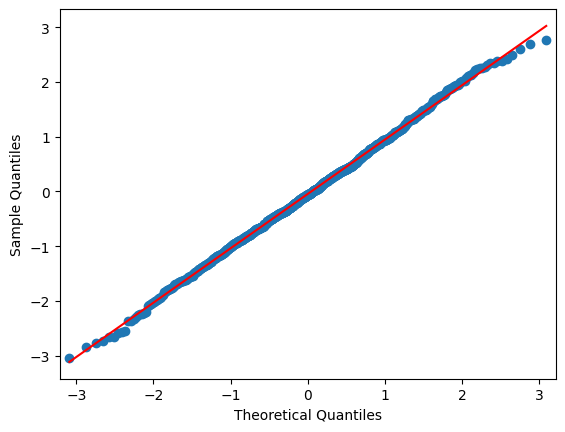

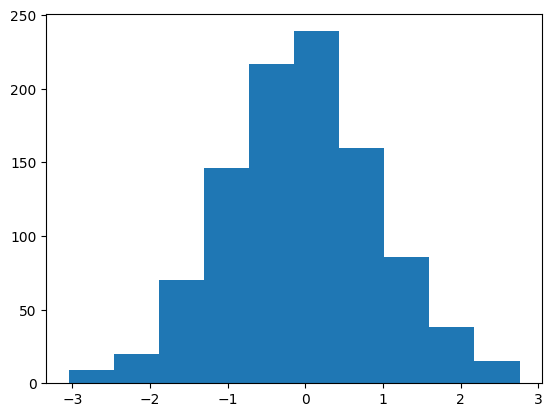

In [116]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# a) Erstelle 1000 normalverteilte Zufallszahlen mit dem Mittelwert 0 und der Standardabweichung 1
np.random.seed(0)                       # bei jeder Ausführung werden die gleichen Zufallszahlen bestimmt
daten = np.random.normal(0, 1, 1000)

# b) Erstelle einen Q-Q-Plot dieser Daten um visuell beurteilen zu können, ob die Daten
# normalverteilt sind oder nicht. Falls ja, dann sollte eine Gerade durch die Punktewolke
# gezeichnet werden können. 
# c) Mit der Option "line = 'r' " können wir das erreichen.
fig = sm.qqplot(daten, line = 'r')
plt.show()

# d) jetzt geben wir noch das Histogramm aus
plt.hist(daten)
plt.show()


## Aufgabe 9 - Stichprobe - zufällige Auswahl von Elementen

#### __Variante 1__: Mit Hilfe von [`numpy`](https://numpy.org/)

In [117]:
import numpy as np

artikel        =  ['Badehosen', 'Langhosen', 'Kurzhosen', 'Wanderschuhe', 'Unterhosen', 'Skischuhe', 'Turnschuhe']
wiederholungen = 3

# a) zufällige Auswahl mit Zurücklegen, Wiederholungen der Artikel gestattet
for i in range(wiederholungen):
    print("a) mit Zurücklegen")
    print('   1:', np.random.choice(artikel, 1))
    print('   2:', np.random.choice(artikel, 2))
    print('   3:', np.random.choice(artikel, 3))

print("---------------------------------------")

# b) zufällige Auswahl ohne Zurücklegen, Wiederholungen der Artikel nicht gestattet
for i in range(wiederholungen):
    print("b) ohne Zurücklegen")
    print('   1:', np.random.choice(artikel, 1, False))
    print('   2:', np.random.choice(artikel, 2, False))
    print('   3:', np.random.choice(artikel, 3, False))

a) mit Zurücklegen
   1: ['Badehosen']
   2: ['Turnschuhe' 'Wanderschuhe']
   3: ['Turnschuhe' 'Turnschuhe' 'Wanderschuhe']
a) mit Zurücklegen
   1: ['Langhosen']
   2: ['Skischuhe' 'Langhosen']
   3: ['Skischuhe' 'Unterhosen' 'Langhosen']
a) mit Zurücklegen
   1: ['Wanderschuhe']
   2: ['Wanderschuhe' 'Wanderschuhe']
   3: ['Langhosen' 'Kurzhosen' 'Skischuhe']
---------------------------------------
b) ohne Zurücklegen
   1: ['Wanderschuhe']
   2: ['Wanderschuhe' 'Badehosen']
   3: ['Skischuhe' 'Unterhosen' 'Langhosen']
b) ohne Zurücklegen
   1: ['Unterhosen']
   2: ['Badehosen' 'Kurzhosen']
   3: ['Langhosen' 'Kurzhosen' 'Badehosen']
b) ohne Zurücklegen
   1: ['Kurzhosen']
   2: ['Langhosen' 'Badehosen']
   3: ['Kurzhosen' 'Wanderschuhe' 'Unterhosen']


#### c) Anzahl Kombinationen
Die Anzahl Möglichkeiten unterscheiden sich je nach dem, ob das Zurücklegen gestattet ist oder nicht und ob die Ordnung eine Rolle spielt oder nicht. In unserem Beispiel handelt es sich um eine Auswahl (Kombination),
bei welcher die Ordnung keine Rolle spielt. Siehe dazu auch Wikipedia: [Kombinationen](https://de.wikipedia.org/wiki/Kombination_(Kombinatorik)).
#### Kombination ohne Wiederholung
Dabei bedeutet $n$ die Anzahl aller Elemente, aus denen ausgewählt wird und $k$ die Anzahl Elemente, welche aus den $n$ ausgewählt werden:
$$
\frac{n!}{k!(n - k)!} = \binom{n}{k} = nCk
$$
#### Kombination mit Wiederholung
Anzahl ungeordneter $k$-Stichproben mit Zurücklegen aus einer Menge  mit $n$ Elementen:
$$
\frac{(n+k-1)!}{k!(n - k)!} = \binom{n+k-1}{k} = \binom{n+k-1}{n-1} 
$$

#### __Variante 2__: Mit Hilfe der Module [`itertools`](https://docs.python.org/3/library/itertools.html) und [`math`](https://docs.python.org/3/library/math.html)

In [118]:
import itertools as iter
import math as math

artikel =  ['Badehosen', 'Langhosen', 'Kurzhosen', 'Wanderschuhe', 'Unterhosen', 'Skischuhe', 'Turnschuhe']
n       = len(artikel)
auswahl = 2

# Biespiel: Es werden #auswahl Elemente ohne und mit Zurücklegen/Wiederholungen ausgewählt
komb_o_W = list(iter.combinations(artikel, auswahl))
komb_m_W = list(iter.combinations_with_replacement(artikel, auswahl))

# Berechnung der Anzahl via Zählen
anz_komb_o_W = len(komb_o_W)
anz_komb_m_W = len(komb_m_W)

# Berechnung der Anzahl via Formel
anz_komb_o_W_math = math.comb(n, auswahl)
anz_komb_m_W_math = math.factorial(n + auswahl - 1) / math.factorial(auswahl)

print("Kombinationen ohne Wiederholung - Zählen:"    , anz_komb_o_W)
print("Kombinationen ohne Wiederholung - Berechnung:", anz_komb_o_W_math)

print("Kombinationen mit Wiederholung - Zählen:"     ,  anz_komb_m_W)
print("Kombinationen mit Wiederholung - Berechnung:" ,  anz_komb_m_W)

Kombinationen ohne Wiederholung - Zählen: 21
Kombinationen ohne Wiederholung - Berechnung: 21
Kombinationen mit Wiederholung - Zählen: 28
Kombinationen mit Wiederholung - Berechnung: 28


### Aufgabe 10 - Zufallszahlen, Histogramme, Verteilungen

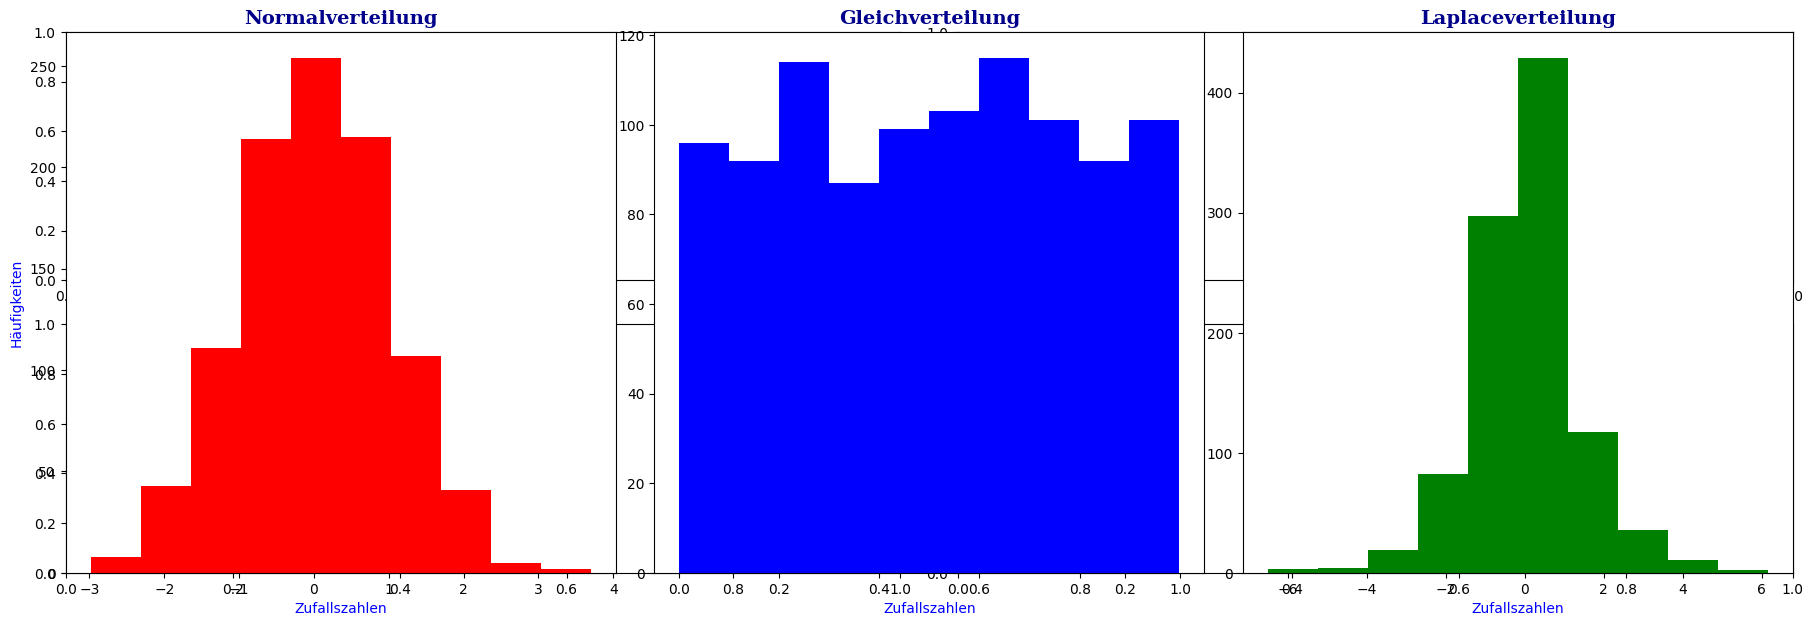

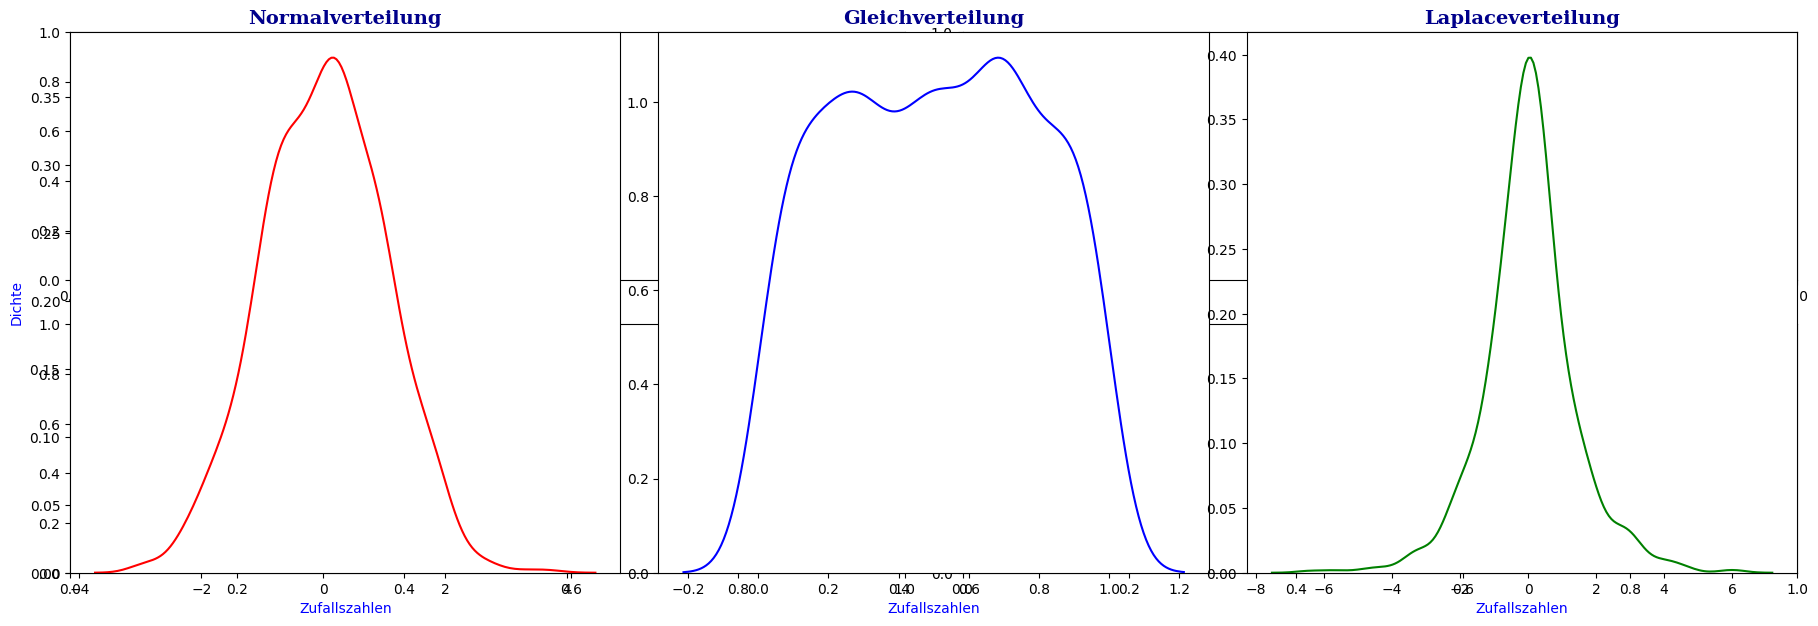

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,laplace,uniform

# Anzahl Zufallszahlen
N = 1000

# a) normalverteilte Zufallszahlen
zufall_1 = norm.rvs   (size = N, random_state=3)

# b) gleichverteilte Zufallszahlen
zufall_2 = uniform.rvs(size = N, random_state=3)

# c) Laplace verteilte  Zufallszahlen
zufall_3 = laplace.rvs(size = N, random_state=3)

# d) Histogramme, nebeneinander
# Grösse der Subplots einstellen; Breite 10 und Höhe 5 Einheiten
fig, ax = plt.subplots(2, 2, figsize=(18,6))
fig.tight_layout()
# mit subplot aus matplotlib dargestellt:
# erster Parameter: anzahl Zeilen
# zweiter Parameter: anzahl Spalten
# dritter Paramter: aktuelle Position
plt.subplot(1, 3, 1)
# erster Parameter: Daten
# zweiter Parameter: Anzahl Balken
# dritter Parameter: Farbe
plt.hist(zufall_1, 10, color = 'red')
plt.title("Normalverteilung", fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 14})
plt.xlabel("Zufallszahlen", color='b')
plt.ylabel("Häufigkeiten", color='b')
plt.subplot(1, 3, 2)
plt.title("Gleichverteilung", fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 14})
plt.hist(zufall_2, 10, color = 'blue')
plt.xlabel("Zufallszahlen", color='b')
#plt.ylabel("Häufigkeiten", color='r')
plt.subplot(1, 3, 3)
plt.title("Laplaceverteilung", fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 14})
plt.hist(zufall_3, 10, color = 'green')
plt.xlabel("Zufallszahlen", color='b')
#plt.ylabel("Häufigkeiten", color='b')
plt.show()

# e) Density-Plots, nebeneinander
# die einfachste Möglichkeit ist der Gebrauch der Methoden aus dem Modul `seaborn``
# Grösse der Subplots einstellen; Breite 10 und Höhe 5 Einheiten
fig, ax = plt.subplots(2, 2, figsize=(18,6))
fig.tight_layout()

plt.subplot(1, 3, 1)
plt.title("Normalverteilung", fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 14})
sns.kdeplot(zufall_1, color='red')
plt.xlabel("Zufallszahlen", color='blue')
plt.ylabel("Dichte", color='blue')
plt.subplot(1, 3, 2)
plt.title("Gleichverteilung", fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 14})
sns.kdeplot(zufall_2, color='blue')
plt.xlabel("Zufallszahlen", color='blue')
plt.ylabel("", color='blue')
plt.subplot(1, 3, 3)
plt.title("Laplaceverteilung", fontdict={'family': 'serif', 'color' : 'darkblue', 'weight': 'bold', 'size': 14})
sns.kdeplot(zufall_3, color='green')
plt.xlabel("Zufallszahlen", color='blue')
plt.ylabel("", color='blue')
plt.show()

# die Verteilungen sollten eigentlich erkennbar sein...